<a href="https://colab.research.google.com/github/OPHoperHPO/image-background-remove-tool/blob/master/docs/other/try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install image-background-remove-tool

In [1]:
#@title Choose branch
branch = 'master'  #@param {type: "string"}
!git clone https://github.com/OPHoperHPO/image-background-remove-tool.git -b $branch
%cd /content/image-background-remove-tool
!pip install -r requirements.txt
!cd ./tools && echo "all" | python setup.py

Cloning into 'image-background-remove-tool'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 564 (delta 37), reused 225 (delta 19), pack-reused 298
Receiving objects: 100% (564/564), 36.44 MiB | 27.66 MiB/s, done.
Resolving deltas: 100% (142/142), done.
/content/image-background-remove-tool
     |████████████████████████████████| 122kB 7.5MB/s 
     |████████████████████████████████| 20.2MB 69.1MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 752.0MB 22kB/s 
     |████████████████████████████████| 71kB 70kB/s 
     |████████████████████████████████| 34.2MB 90kB/s 
     |████████████████████████████████| 757kB 54.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 26.3MB 115kB/s 
     |███████████████████████████

Choose which model you want to install:
u2net
basnet
u2netp
xception_model
mobile_net_model
all
Enter model name: Create folders
Start download model archives!
Downloading...
From: http://download.tensorflow.org/models/deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz
To: /content/image-background-remove-tool/models/mobile_net_model/model.tar.gz
100% 23.9M/23.9M [00:00<00:00, 64.9MB/s]
Downloading...
From: http://download.tensorflow.org/models/deeplabv3_pascal_train_aug_2018_01_04.tar.gz
To: /content/image-background-remove-tool/models/xception_model/model.tar.gz
100% 460M/460M [00:15<00:00, 30.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/image-background-remove-tool/models/u2net/u2net.pth
176MB [00:02, 79.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/image-background-remove-tool/models/u2netp/u2netp.pth
4.68MB [00:00, 34.8MB/s]
Downloading...
From: https://drive.goo

# Try

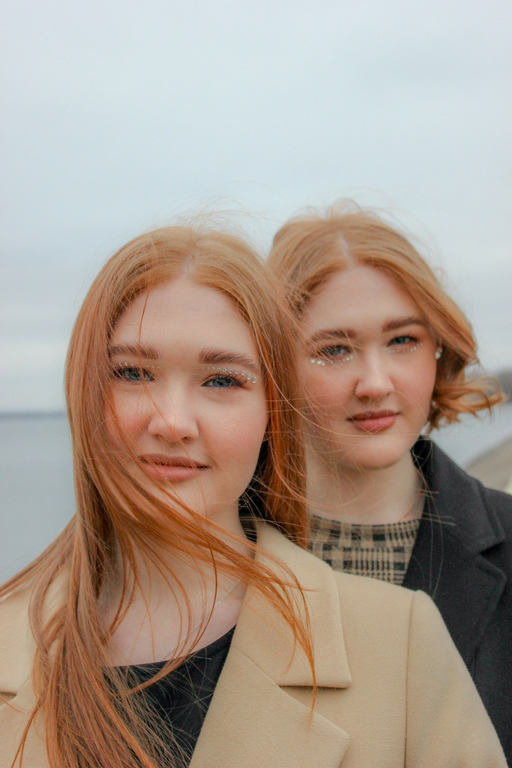

2020-06-22 17:32:55.888103: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
121888KB [00:04, 27035.70KB/s]                


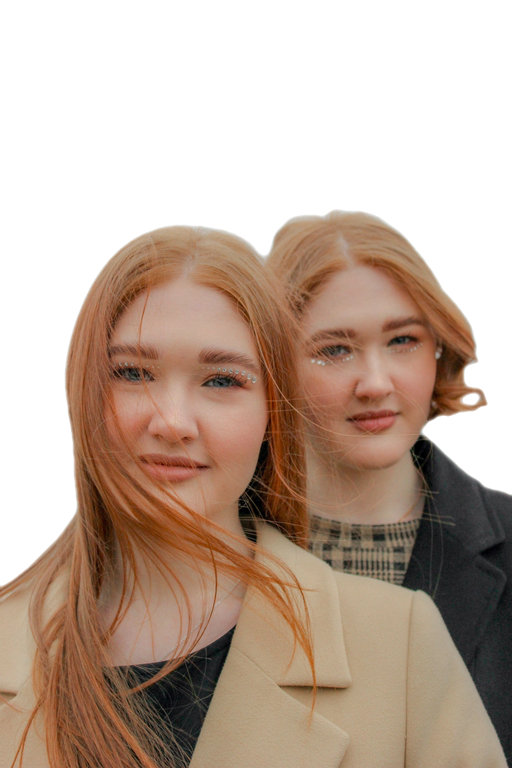

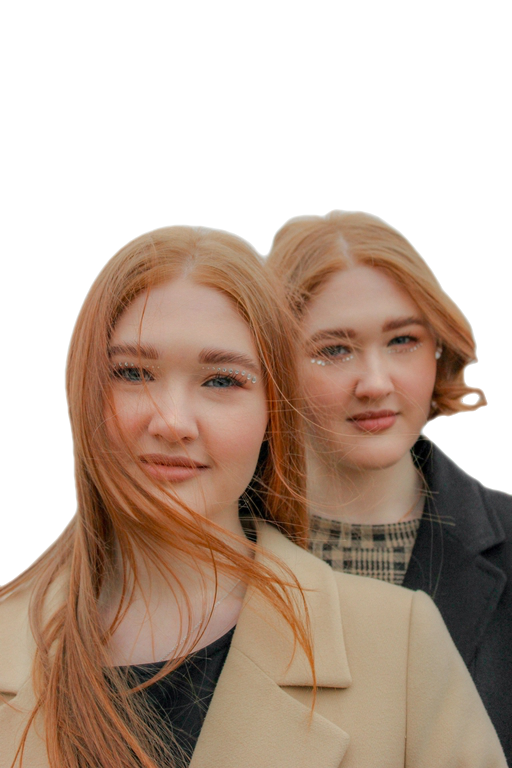

In [2]:
#@title Try it yourself
#@markdown Choose a model and algorithms to improve the result
img_url = 'https://github.com/OPHoperHPO/image-background-remove-tool/raw/master/docs/imgs/input/4.jpg'  #@param {type: "string"}
preprocessing = "bbd-fastrcnn" #@param ["bbd-fastrcnn", "bbmd-maskrcnn", "None"] {allow-input: false}
model_name = "u2net" #@param ["u2net", "basnet", "u2netp", "mobile_net_model", "xception_model"] {allow-input: false}
postprocessing = "fba" #@param ["fba", "rtb-bnb", "rtb-bnb2", "No"] {allow-input: false}
!wget -q -O ./1.jpg "$img_url"  > /dev/null

from IPython.display import display
from PIL import Image
import os


display(Image.open("./1.jpg"))
if os.path.exists("./1.jpg"):
  f = "1.jpg"
  !python main.py -i ./1.jpg -o ./2.png -m $model_name -prep $preprocessing -postp $postprocessing
  image = Image.open("./2.png")
  new = Image.new("RGB", image.size, (255, 255, 255))
  new.paste(image, (0,0), image)
  display(new)
  display(image)